<a href="https://colab.research.google.com/github/Intelligent07/Codveda_Intership/blob/main/Level_1_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Level 1, Task 1: Data Cleaning and Preprocessing ---
Original DataFrame (first 5 rows):
                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1 

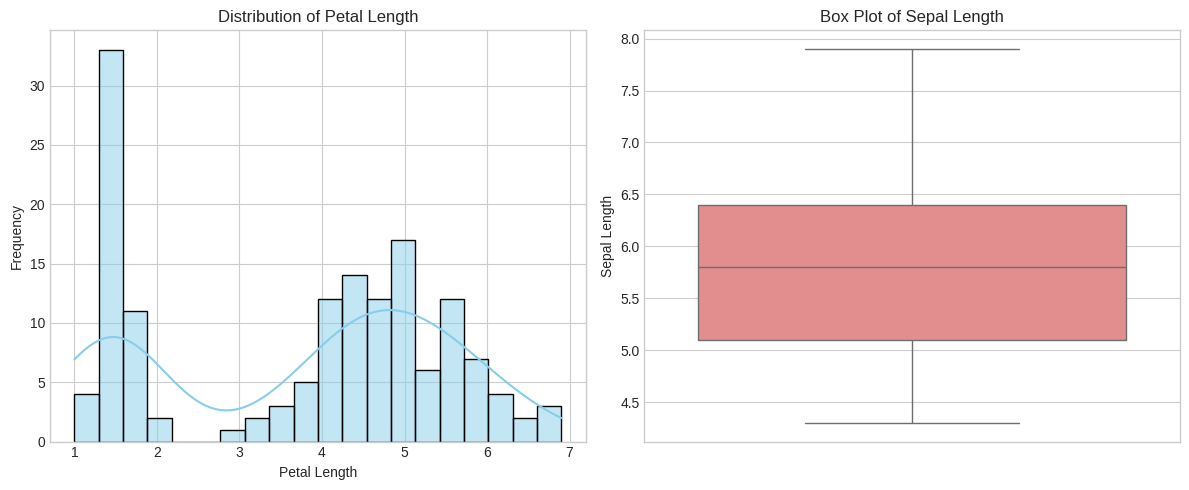


Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


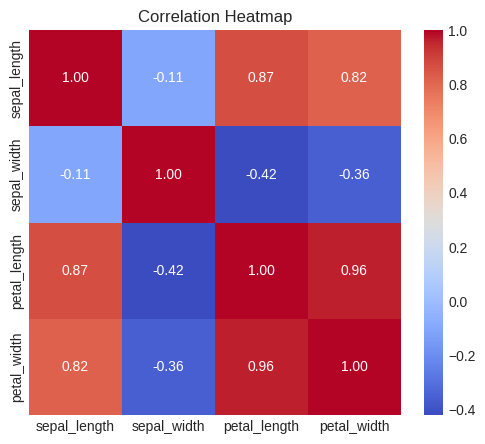



--- Level 1, Task 3: Basic Data Visualization ---


/tmp/ipython-input-2133406907.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species', y='petal_length', data=avg_petal_length, palette='viridis')


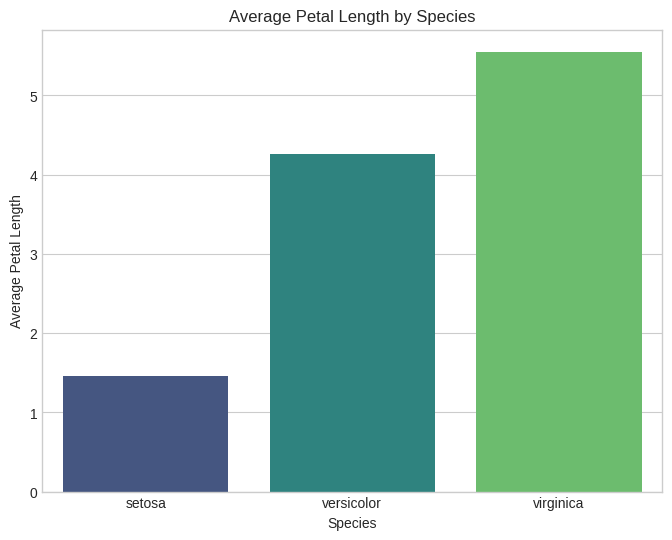

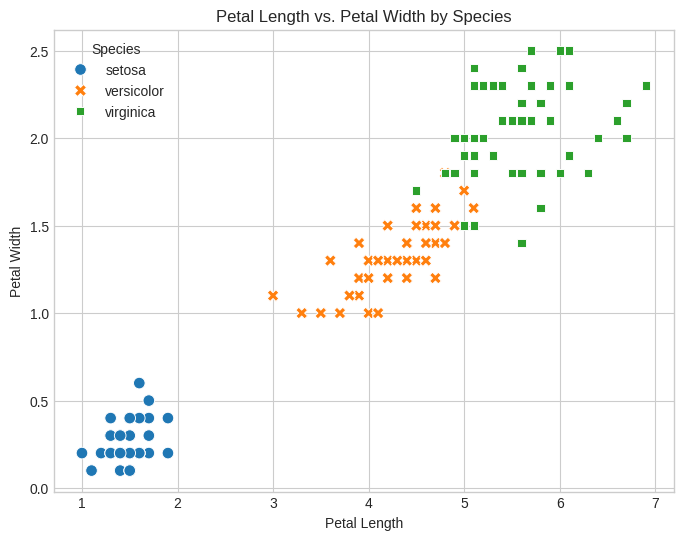

In [ ]:
# level1_all tasks



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def level1_task1_data_cleaning():
    """
    Task 1: Data Cleaning and Preprocessing
    Objective: Clean and prepare a raw dataset.
    This function uses the 'Sentiment dataset.csv' to demonstrate handling missing
    values, removing duplicates, and standardizing data formats.
    """
    print("--- Level 1, Task 1: Data Cleaning and Preprocessing ---")

    # Load the Sentiment dataset which contains missing values and text formatting issues.
    df = pd.read_csv('/content/3) Sentiment dataset.csv')

    # Drop the first two unnamed columns as they are not needed.
    df = df.iloc[:, 2:]

    print("Original DataFrame (first 5 rows):")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()

    # 1. Identify and handle missing values
    # We will remove any rows where 'Text' or 'Sentiment' is missing.
    print("\nNumber of rows with missing values before cleaning:", df.isnull().any(axis=1).sum())
    df.dropna(subset=['Text', 'Sentiment'], inplace=True)
    print("Number of rows with missing values after cleaning:", df.isnull().any(axis=1).sum())

    # 2. Remove duplicate rows
    # To demonstrate this step, we will manually add a duplicate row.
    print("\nNumber of duplicate rows before removal:", df.duplicated().sum())
    df = pd.concat([df, df.iloc[[0]]], ignore_index=True)
    print("Number of duplicate rows after manual addition:", df.duplicated().sum())
    df.drop_duplicates(inplace=True)
    print("Number of duplicate rows after removal:", df.duplicated().sum())

    # 3. Standardize inconsistent data formats
    # Clean the 'Text' column by removing leading/trailing whitespace.
    df['Text'] = df['Text'].str.strip()

    # Convert the 'Timestamp' column to a datetime object.
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    print("\nCleaned and standardized DataFrame (first 5 rows):")
    print(df.head())
    print("\nCleaned DataFrame Info:")
    df.info()

def level1_task2_eda():
    """
    Task 2: Exploratory Data Analysis (EDA)
    Objective: Perform exploratory analysis to identify patterns, trends, and summary statistics.
    This function uses the 'iris.csv' dataset to showcase EDA techniques.
    """
    print("\n\n--- Level 1, Task 2: Exploratory Data Analysis (EDA) ---")

    # Load the Iris dataset.
    df = pd.read_csv('/content/1) iris.csv')

    print("Iris EDA DataFrame:")
    print(df.head())

    # 1. Calculate Summary Statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # 2. Visualize Data Distributions
    plt.style.use('seaborn-v0_8-whitegrid')

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['petal_length'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Petal Length')
    plt.xlabel('Petal Length')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=df['sepal_length'], color='lightcoral')
    plt.title('Box Plot of Sepal Length')
    plt.ylabel('Sepal Length')

    plt.tight_layout()
    plt.show()

    # 3. Find Correlations
    print("\nCorrelation Matrix:")
    corr_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
    print(corr_matrix)

    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

def level1_task3_basic_visualization():
    """
    Task 3: Basic Data Visualization
    Objective: Create basic plots to visualize data distributions and relationships.
    This function uses the 'iris.csv' dataset to create a bar plot and a scatter plot.
    """
    print("\n\n--- Level 1, Task 3: Basic Data Visualization ---")

    # Load the Iris dataset.
    df = pd.read_csv('/content/1) iris.csv')

    # 1. Bar Plot (Average petal_length by species)
    avg_petal_length = df.groupby('species')['petal_length'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(x='species', y='petal_length', data=avg_petal_length, palette='viridis')
    plt.title('Average Petal Length by Species')
    plt.xlabel('Species')
    plt.ylabel('Average Petal Length')
    plt.show()

    # 2. Scatter Plot (Petal length vs. Petal width)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species', style='species', s=70)
    plt.title('Petal Length vs. Petal Width by Species')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.legend(title='Species')
    plt.show()

if __name__ == "__main__":
    level1_task1_data_cleaning()
    level1_task2_eda()
    level1_task3_basic_visualization()